In [9]:
# SVR
# SVR class requires feature scaling

# Regression template:-

# Data Preprocessing:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separating into dependent and independent variables
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [2]:
# Fitting the SVR to the dataset
# Create your regressor here
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)
# The SVR class has got kernel variable which takes in which kernel function we wanna use
# Linear kernel makes a linear reg model among the data, we won't use that
# Here we use RBF, which is used by default


# Predicting SVR result with a new input
y_pred = regressor.predict([[6.5]])        # This predicts a way low value than polynomial regression

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [3]:
y_pred

array([130001.55760156])

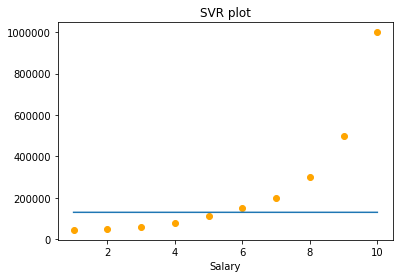

In [4]:
# Visualising the SVR results
# But the graph seems to be flat
# So we had to feature scale this
y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('SVR plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

In [10]:
# We see that shitty line
# We need to feature scale it then run the above
# Feature Scaling:-
'''# Run the first cell then start again from here'''
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
# We do feature scaling here cz the SVR class is a less common class and doesn't feature scale automatically
# Feature scaling doesn't work with vectors but a matrix. So we gotta change the 'y' variable a bit, see in the 1st cell

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
x        # Feature scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [12]:
y       # Feature scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


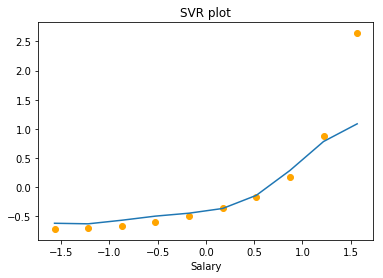

In [15]:
y_pred = regressor.predict(x)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('SVR plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()
# We get a different result now
# In the regressor the algorithm selects some penalty parameters within the matrix of features thus the salary of the CEO
# becomes an outlier because its way beyond the other points, so ignored

In [16]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

# We scale the value of 6.5 then predict it, sc_x takes in a matrix as input always, so we convert the input to a 1x1 matrix
# Then we inverse transform the prediction to the actual scale

In [17]:
y_pred        # Now we get the good prediction

array([170370.0204065])

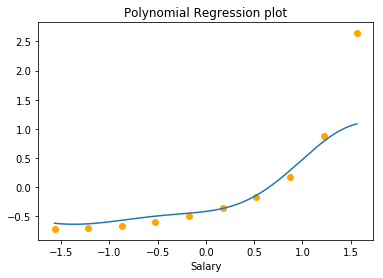

In [18]:
# Visualising the Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

y_pred = regressor.predict(x_grid)
plt.scatter(x, y, color = 'orange')
plt.plot(x_grid, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()